# LABORATORY SESSION - WEEK 4 

### Exeercise 1 

Import the data and draw their histograms.

### Solution 

In [7]:
import networkx as nx
import os

def read_network_from_edges(file_path_list):
    """
    Read networks from a list of .edges format files.
    
    Parameters:
    - file_path_list (list): List of paths to .edges files.
    
    Returns:
    - list of networkx.Graph: The loaded graphs.
    """
    graph_list = []
    for file_path in file_path_list:
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue
        try:
            # Load the graph from the .edges file
            G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', float),))
            graph_list.append(G)
        except Exception as e:
            print(f"An error occurred while reading the file '{file_path}': {e}")
    return graph_list

# Example usage
file_path_list = [r'data\bio-CE-HT.edges', r'data\email-univ.edges']
graph_list = read_network_from_edges(file_path_list)

# Check if graphs were loaded successfully
if graph_list and len(graph_list) >= 2:
    G1, G2 = graph_list[0], graph_list[1]
    # Print summary of the graphs
    print(G1)
    print(G2)
else:
    print("One or both graphs could not be loaded.")

Graph with 2617 nodes and 2985 edges
Graph with 1133 nodes and 5451 edges


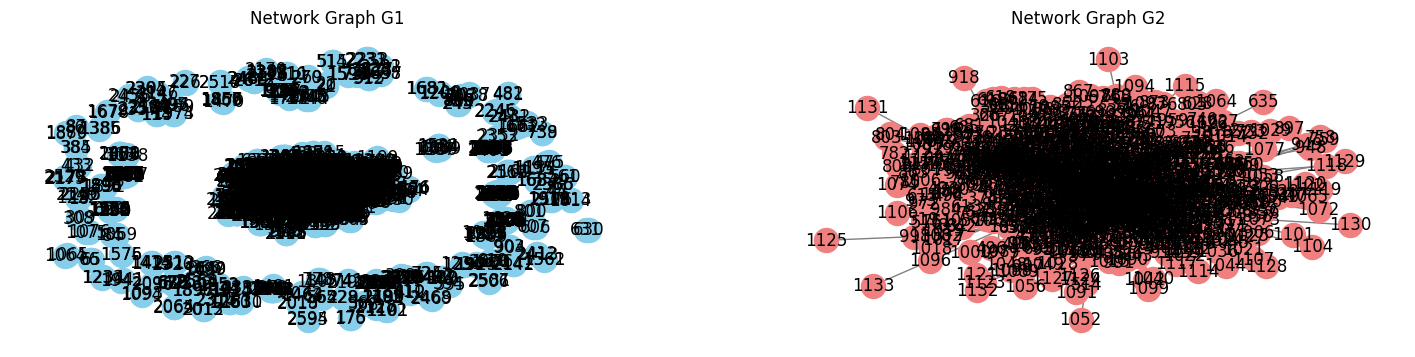

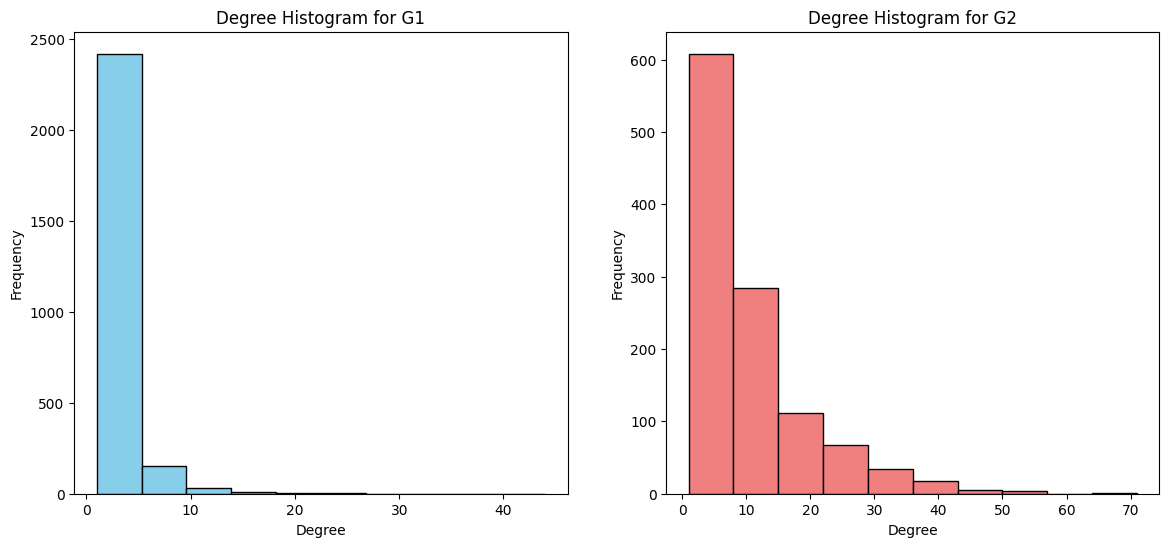

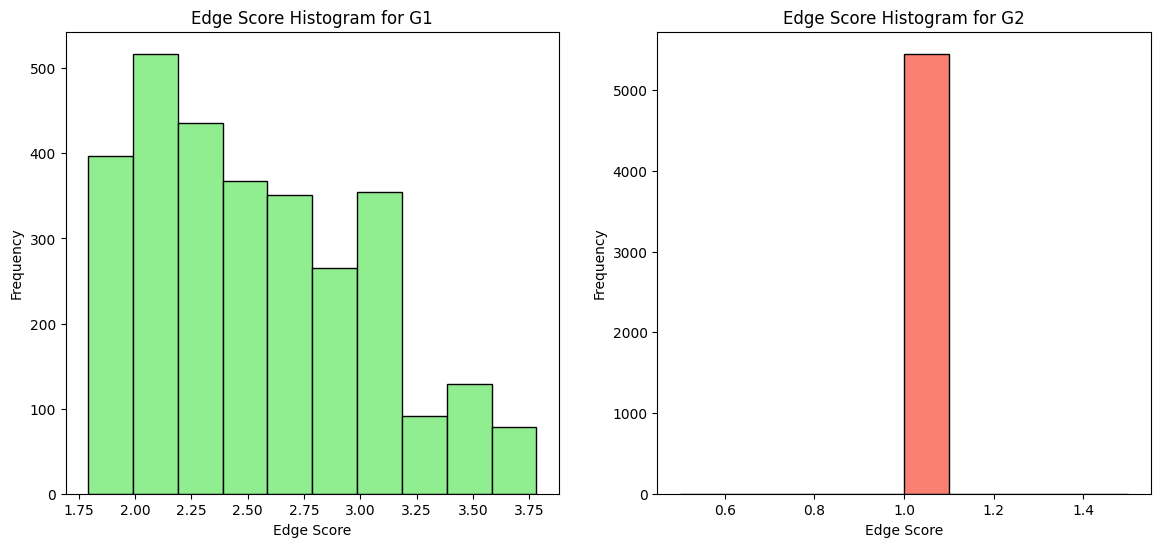

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

# Plot network graphs for G1 and G2
plt.figure(figsize=(18, 9))

# Plot G1
plt.subplot(2, 2, 1)
pos1 = nx.spring_layout(G1)
nx.draw(G1, pos1, with_labels=True, node_size=300, node_color="skyblue", edge_color="gray")
plt.title("Network Graph G1")

# Plot G2
plt.subplot(2, 2, 2)
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, with_labels=True, node_size=300, node_color="lightcoral", edge_color="gray")
plt.title("Network Graph G2")

plt.show()

# Degree histogram for G1 and G2
plt.figure(figsize=(14, 6))

# Degree histogram for G1
degrees1 = [degree for node, degree in G1.degree()]
plt.subplot(1, 2, 1)
plt.hist(degrees1, bins=10, color='skyblue', edgecolor='black')
plt.title("Degree Histogram for G1")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Degree histogram for G2
degrees2 = [degree for node, degree in G2.degree()]
plt.subplot(1, 2, 2)
plt.hist(degrees2, bins=10, color='lightcoral', edgecolor='black')
plt.title("Degree Histogram for G2")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.show()

# Edge score histograms for G1 and G2
plt.figure(figsize=(14, 6))

# Edge score histogram for G1
weights1 = [data['weight'] if 'weight' in data else 1 for _, _, data in G1.edges(data=True)]
plt.subplot(1, 2, 1)
plt.hist(weights1, bins=10, color='lightgreen', edgecolor='black')
plt.title("Edge Score Histogram for G1")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")

# Edge score histogram for G2
weights2 = [data['weight'] if 'weight' in data else 1 for _, _, data in G2.edges(data=True)]
plt.subplot(1, 2, 2)
plt.hist(weights2, bins=10, color='salmon', edgecolor='black')
plt.title("Edge Score Histogram for G2")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")

plt.show()

### Exercise 2

Correct the scale of the plot's axes to double logarithmic.

### Solution 

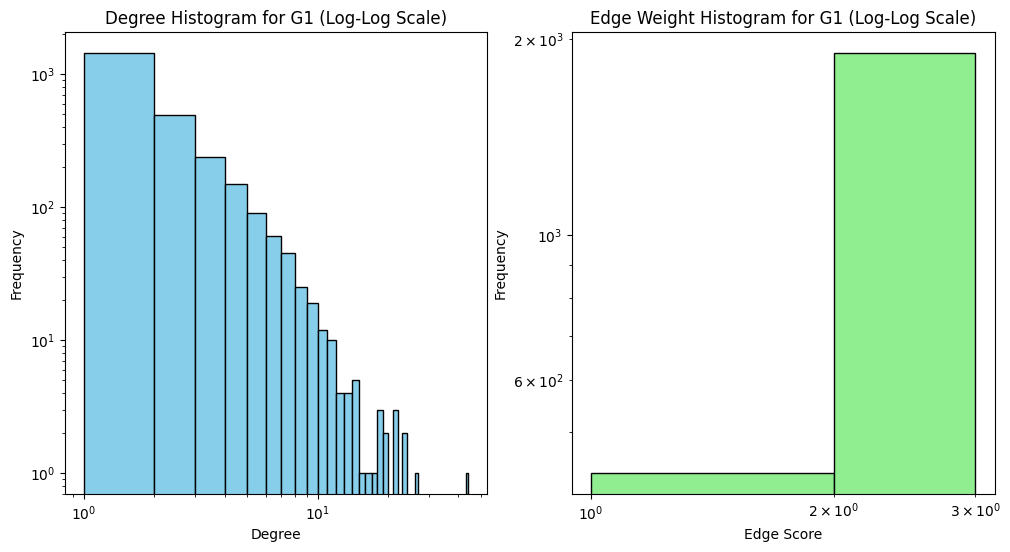

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1200x600 with 2 Axes>

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

# Calculate degree sequences for G1 and G2
degrees1 = [degree for _, degree in G1.degree()]
weights1 = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]  # Default to 1 if 'weight' is missing
degrees2 = [degree for _, degree in G2.degree()]
weights2 = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]  # Default to 1 if 'weight' is missing

# Degree and edge weight histograms for G1 in log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G1
plt.subplot(1, 2, 1)
plt.hist(degrees1, bins=range(1, max(degrees1) + 1), color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G1 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G1
plt.subplot(1, 2, 2)
plt.hist(weights1, bins=range(1, int(max(weights1)) + 1), color='lightgreen', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Weight Histogram for G1 (Log-Log Scale)")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")
plt.show()

# Degree and edge weight histograms for G2 in log-log scale
plt.figure(figsize=(12, 6))

# Degree histogram for G2
plt.subplot(1, 2, 1)
plt.hist(degrees2, bins=range(1, max(degrees2) + 1), color='lightcoral', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G2 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G2
plt.subplot(1, 2, 2)
plt.hist(weights2, bins=range(1, int(max(weights2)) + 1), color='lightblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Weight Histogram for G2 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.show()


### Exercise 3

Apply logarithmic binning as well.

### Solution

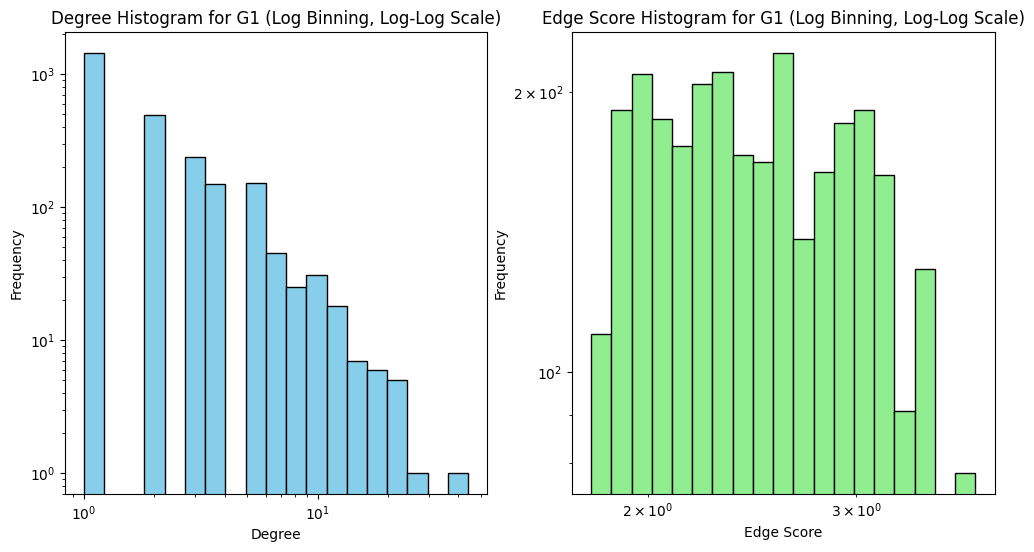

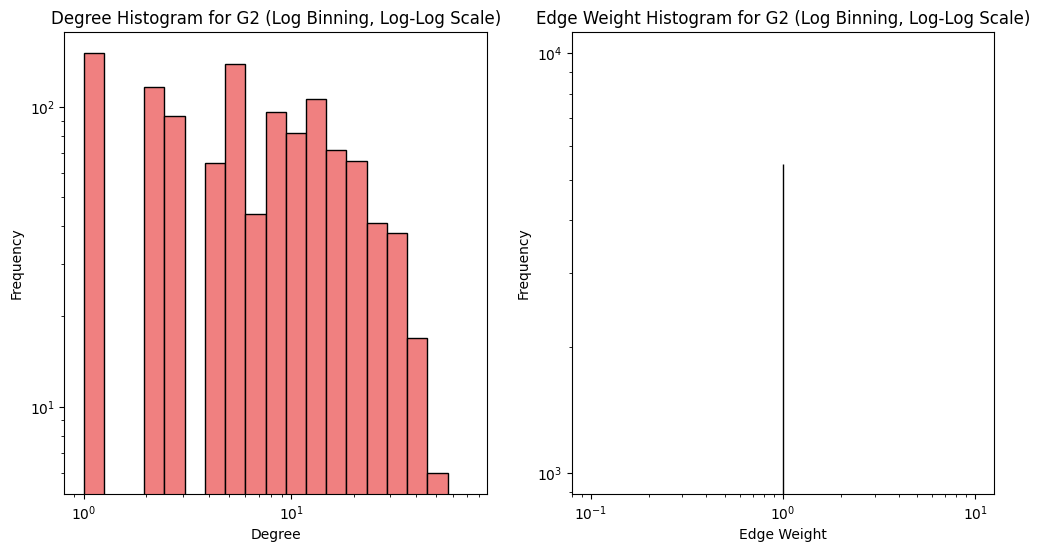

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to create logarithmic bins
def log_bins(data, num_bins=20):
    min_val = min(data)
    max_val = max(data)
    bins = np.logspace(np.log10(min_val), np.log10(max_val), num_bins)
    return bins

# Calculate degree sequences for G1 and G2
degrees1 = [degree for _, degree in G1.degree()]
weights1 = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]  # Default to 1 if 'weight' is missing
degrees2 = [degree for _, degree in G2.degree()]
weights2 = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]  # Default to 1 if 'weight' is missing

# Plot degree and edge weight histograms for G1
plt.figure(figsize=(12, 6))

# Degree histogram for G1 with logarithmic binning and log-log scale
plt.subplot(1, 2, 1)
log_bins_degrees1 = log_bins(degrees1)
plt.hist(degrees1, bins=log_bins_degrees1, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G1 (Log Binning, Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G1 with logarithmic binning and log-log scale
plt.subplot(1, 2, 2)
log_bins_weights1 = log_bins(weights1)
plt.hist(weights1, bins=log_bins_weights1, color='lightgreen', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Score Histogram for G1 (Log Binning, Log-Log Scale)")
plt.xlabel("Edge Score")
plt.ylabel("Frequency")
plt.show()

# Plot degree and edge weight histograms for G2
plt.figure(figsize=(12, 6))

# Degree histogram for G2 with logarithmic binning and log-log scale
plt.subplot(1, 2, 1)
log_bins_degrees2 = log_bins(degrees2)
plt.hist(degrees2, bins=log_bins_degrees2, color='lightcoral', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Histogram for G2 (Log Binning, Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Frequency")

# Edge weight histogram for G2 with logarithmic binning and log-log scale
plt.subplot(1, 2, 2)
log_bins_weights2 = log_bins(weights2)
plt.hist(weights2, bins=log_bins_weights2, color='lightblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.title("Edge Weight Histogram for G2 (Log Binning, Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Frequency")
plt.show()


### Exercise 4 

Compute and draw the survival function.

### Solution 

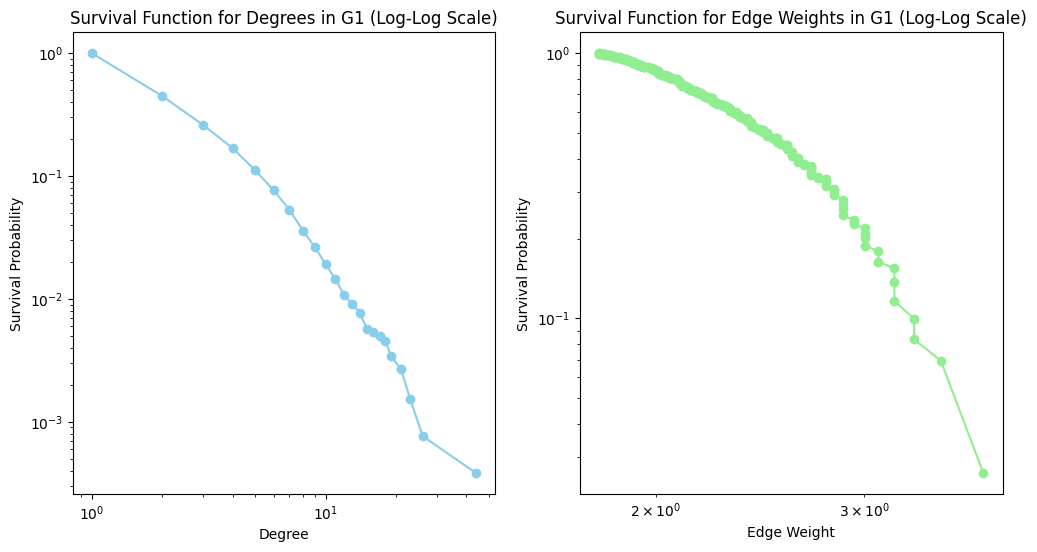

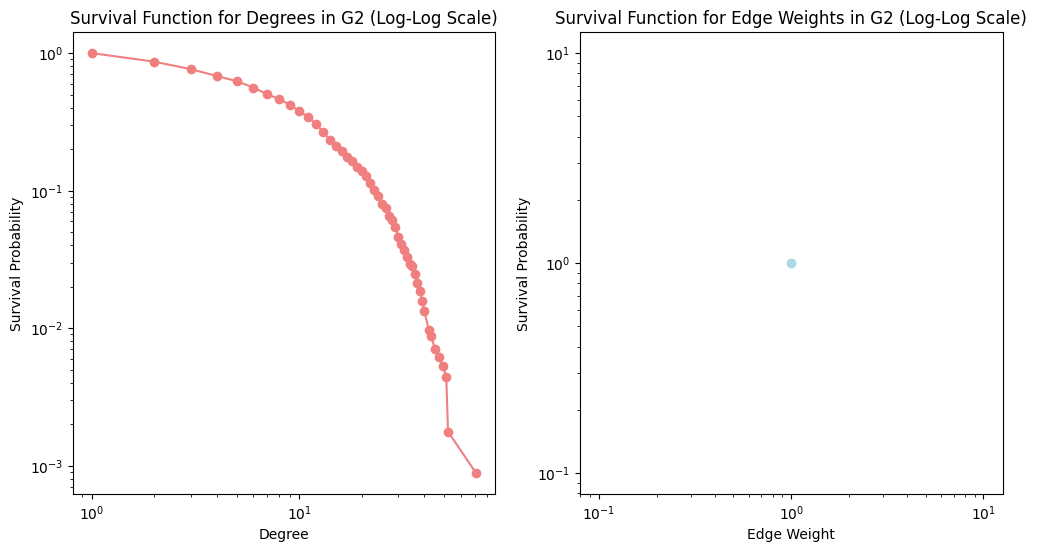

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute survival function
def survival_function(data):
    values, counts = np.unique(data, return_counts=True)
    cumsum = np.cumsum(counts[::-1])[::-1]  # Reverse cumulative sum
    survival_prob = cumsum / cumsum[0]  # Normalize to get probabilities
    return values, survival_prob

# Calculate degree sequences for G1 and G2
degrees1 = [degree for _, degree in G1.degree()]
weights1 = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]  # Default to 1 if 'weight' is missing
degrees2 = [degree for _, degree in G2.degree()]
weights2 = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]  # Default to 1 if 'weight' is missing

# Compute and plot survival functions for G1
plt.figure(figsize=(12, 6))

# Degree survival function for G1
plt.subplot(1, 2, 1)
values_degrees1, survival_degrees1 = survival_function(degrees1)
plt.plot(values_degrees1, survival_degrees1, marker='o', linestyle='-', color='skyblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Degrees in G1 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")

# Edge weight survival function for G1
plt.subplot(1, 2, 2)
values_weights1, survival_weights1 = survival_function(weights1)
plt.plot(values_weights1, survival_weights1, marker='o', linestyle='-', color='lightgreen')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Edge Weights in G1 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.show()

# Compute and plot survival functions for G2
plt.figure(figsize=(12, 6))

# Degree survival function for G2
plt.subplot(1, 2, 1)
values_degrees2, survival_degrees2 = survival_function(degrees2)
plt.plot(values_degrees2, survival_degrees2, marker='o', linestyle='-', color='lightcoral')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Degrees in G2 (Log-Log Scale)")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")

# Edge weight survival function for G2
plt.subplot(1, 2, 2)
values_weights2, survival_weights2 = survival_function(weights2)
plt.plot(values_weights2, survival_weights2, marker='o', linestyle='-', color='lightblue')
plt.xscale('log')
plt.yscale('log')
plt.title("Survival Function for Edge Weights in G2 (Log-Log Scale)")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.show()


### Exercise 5 

Which chart is the most readable? Which one is the most robust to noise?

### Solution 

The bigger the network is the better the readability is, in this case. Same for robustness to noise.

### Exercise 6

Apply linear regression to the priviouse plots to compute the parameter $\alpha$ estimator.

### Solution

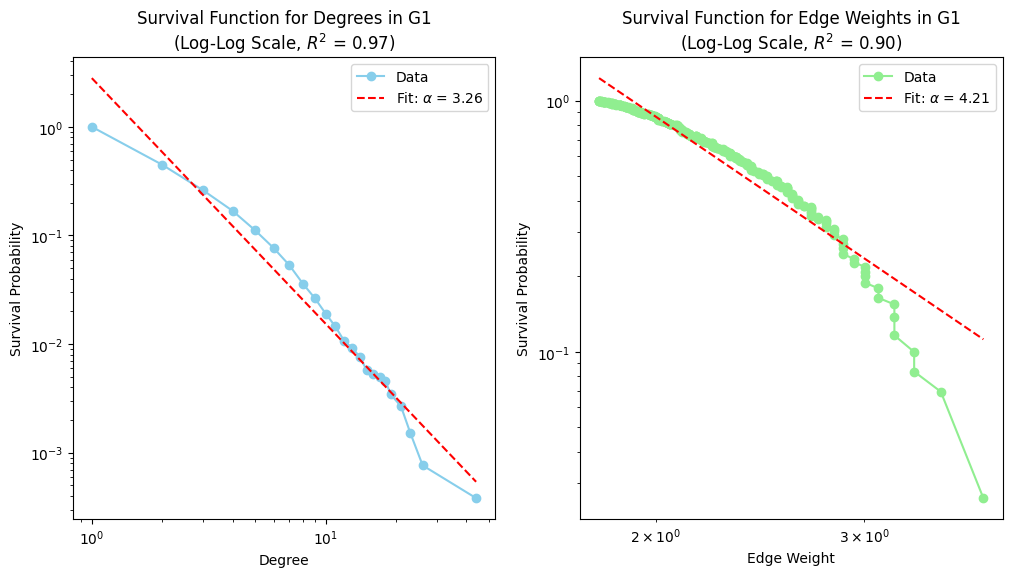

C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


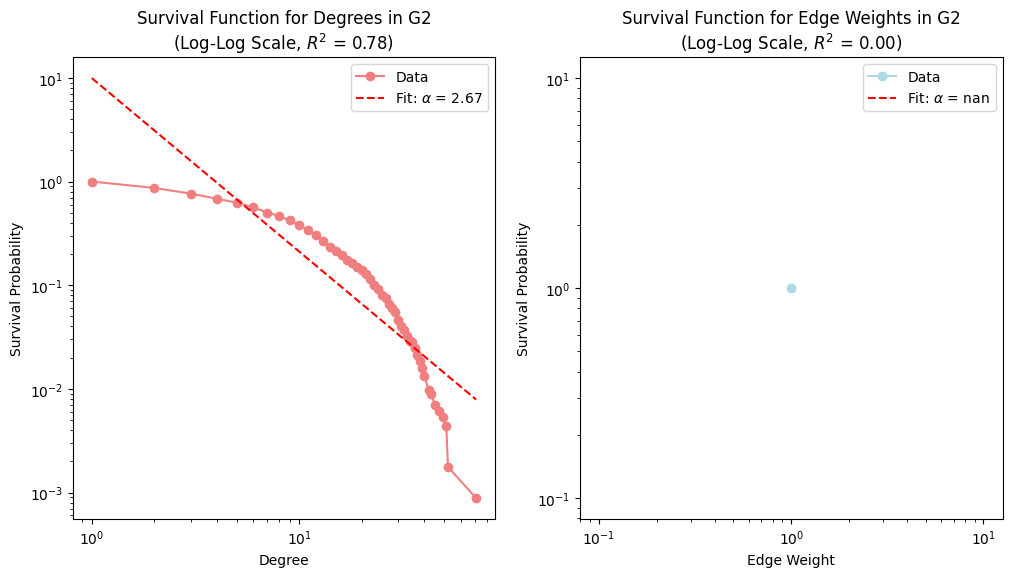

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to compute survival function
def survival_function(data):
    values, counts = np.unique(data, return_counts=True)
    cumsum = np.cumsum(counts[::-1])[::-1]  # Reverse cumulative sum
    survival_prob = cumsum / cumsum[0]  # Normalize to get probabilities
    return values, survival_prob

# Function to perform linear regression on log-log data and compute alpha
def estimate_alpha(values, survival_prob):
    log_values = np.log(values)
    log_survival_prob = np.log(survival_prob)
    slope, intercept, r_value, p_value, std_err = linregress(log_values, log_survival_prob)
    alpha = 1 - slope  # Compute alpha from the slope
    return alpha, slope, intercept, r_value**2

# Calculate degree sequences for G1 and G2
degrees1 = [degree for _, degree in G1.degree()]
weights1 = [data.get('weight', 1) for _, _, data in G1.edges(data=True)]  # Default to 1 if 'weight' is missing
degrees2 = [degree for _, degree in G2.degree()]
weights2 = [data.get('weight', 1) for _, _, data in G2.edges(data=True)]  # Default to 1 if 'weight' is missing

# Plot and estimate alpha for G1
plt.figure(figsize=(12, 6))

# Degree survival function and linear regression for G1
plt.subplot(1, 2, 1)
values_degrees1, survival_degrees1 = survival_function(degrees1)
plt.plot(values_degrees1, survival_degrees1, marker='o', linestyle='-', color='skyblue', label='Data')
alpha_degrees1, slope1, intercept1, r_squared1 = estimate_alpha(values_degrees1, survival_degrees1)
plt.plot(values_degrees1, np.exp(slope1 * np.log(values_degrees1) + intercept1), 'r--', label=f'Fit: $\\alpha$ = {alpha_degrees1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Degrees in G1\n(Log-Log Scale, $R^2$ = {r_squared1:.2f})")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")
plt.legend()

# Edge weight survival function and linear regression for G1
plt.subplot(1, 2, 2)
values_weights1, survival_weights1 = survival_function(weights1)
plt.plot(values_weights1, survival_weights1, marker='o', linestyle='-', color='lightgreen', label='Data')
alpha_weights1, slope2, intercept2, r_squared2 = estimate_alpha(values_weights1, survival_weights1)
plt.plot(values_weights1, np.exp(slope2 * np.log(values_weights1) + intercept2), 'r--', label=f'Fit: $\\alpha$ = {alpha_weights1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Edge Weights in G1\n(Log-Log Scale, $R^2$ = {r_squared2:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

# Plot and estimate alpha for G2
plt.figure(figsize=(12, 6))

# Degree survival function and linear regression for G2
plt.subplot(1, 2, 1)
values_degrees2, survival_degrees2 = survival_function(degrees2)
plt.plot(values_degrees2, survival_degrees2, marker='o', linestyle='-', color='lightcoral', label='Data')
alpha_degrees2, slope3, intercept3, r_squared3 = estimate_alpha(values_degrees2, survival_degrees2)
plt.plot(values_degrees2, np.exp(slope3 * np.log(values_degrees2) + intercept3), 'r--', label=f'Fit: $\\alpha$ = {alpha_degrees2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Degrees in G2\n(Log-Log Scale, $R^2$ = {r_squared3:.2f})")
plt.xlabel("Degree")
plt.ylabel("Survival Probability")
plt.legend()

# Edge weight survival function and linear regression for G2
plt.subplot(1, 2, 2)
values_weights2, survival_weights2 = survival_function(weights2)
plt.plot(values_weights2, survival_weights2, marker='o', linestyle='-', color='lightblue', label='Data')
alpha_weights2, slope4, intercept4, r_squared4 = estimate_alpha(values_weights2, survival_weights2)
plt.plot(values_weights2, np.exp(slope4 * np.log(values_weights2) + intercept4), 'r--', label=f'Fit: $\\alpha$ = {alpha_weights2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Survival Function for Edge Weights in G2\n(Log-Log Scale, $R^2$ = {r_squared4:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


### Exercise 7

Compute MLE estimator for parameter alpha with known parameter $x_{min}$ assuminng the following distribution:

$$ \frac{\alpha - 1}{x_{min}} (\frac{x}{x_{min}})^{-\alpha}$$

### Solution

### Step 1: Log-Likelihood Function

Given a sample $( x_1, x_2, \ldots, x_n )$ where each $ x_i \geq x_{\text{min}} $, the probability density function (PDF) for the power-law distribution is:

$$
f(x) = \frac{\alpha - 1}{x_{\text{min}}} \left(\frac{x}{x_{\text{min}}}\right)^{-\alpha}
$$

The log-likelihood function for $\alpha$ is then given by:

$$
\log L(\alpha) = \sum_{i=1}^n \log \left( \frac{\alpha - 1}{x_{\text{min}}} \left( \frac{x_i}{x_{\text{min}}} \right)^{-\alpha} \right)
$$

Expanding the logarithm terms, we get:

$$
\log L(\alpha) = n \log (\alpha - 1) - n \log (x_{\text{min}}) - \alpha \sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right)
$$

### Step 2: Taking the Derivative and Solving for $\alpha$

To find the MLE for $\alpha$, we take the derivative of $\log L(\alpha)$ with respect to $\alpha$ and set it to zero:

$$
\frac{d}{d\alpha} \log L(\alpha) = \frac{n}{\alpha - 1} - \sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right) = 0
$$

Rearranging, we solve for $\alpha$:

$$
\alpha = 1 + \frac{n}{\sum_{i=1}^n \log \left( \frac{x_i}{x_{\text{min}}} \right)}
$$

This gives the MLE estimator for \(\alpha\).



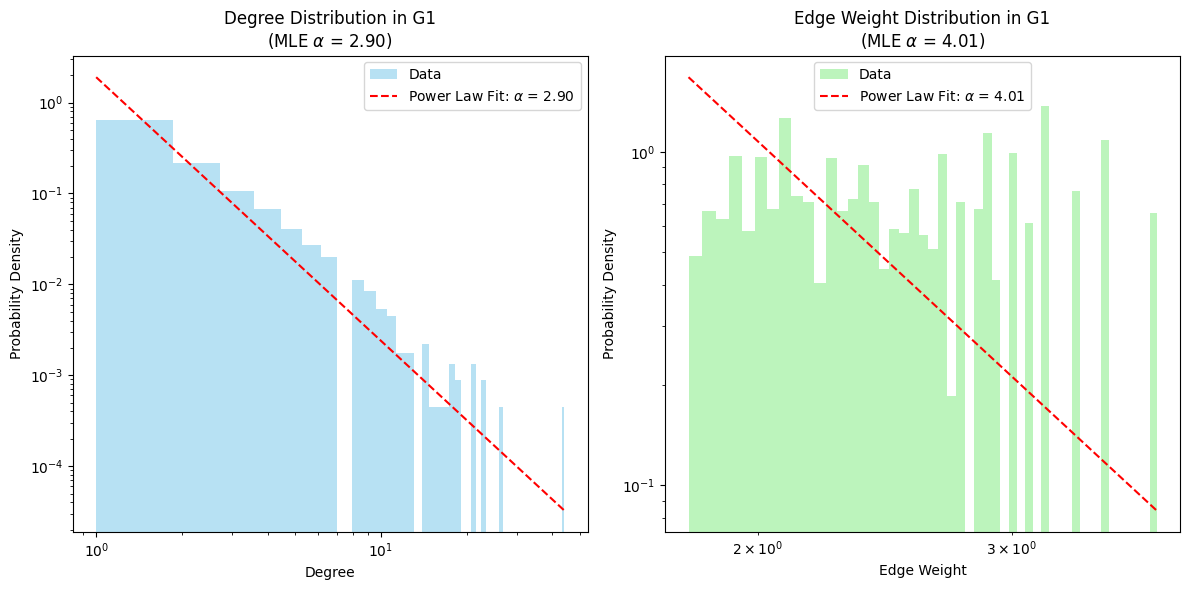

C:\Users\39392\AppData\Local\Temp\ipykernel_14596\3633018484.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  alpha_mle = 1 + n / log_sum


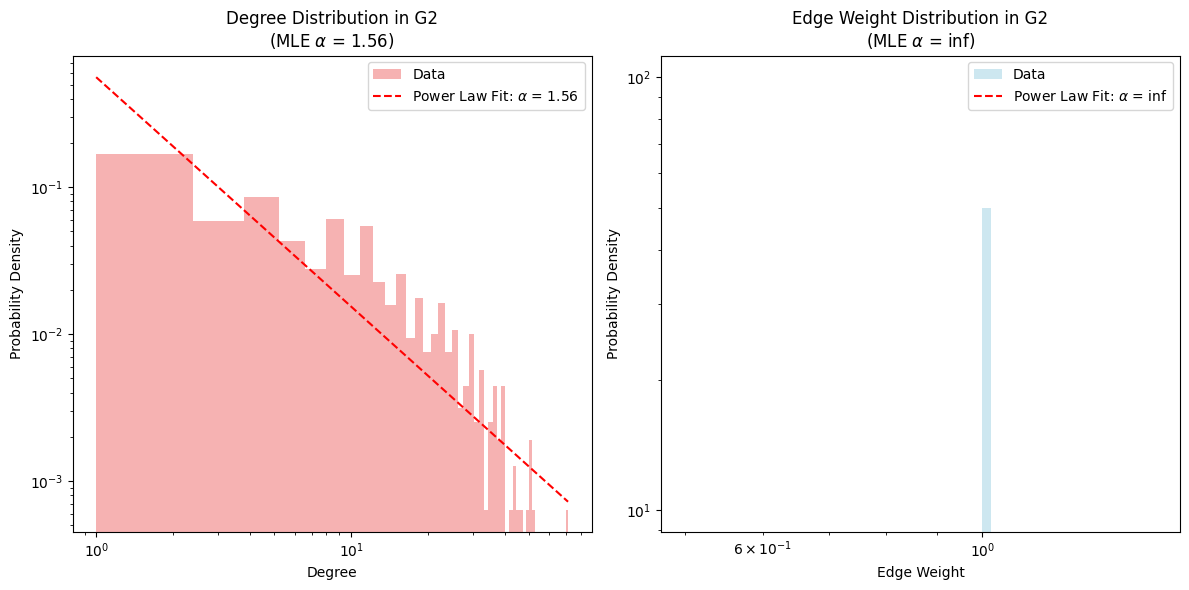

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to compute MLE for alpha
def mle_alpha(data, x_min):
    # Filter the data to include only values >= x_min
    filtered_data = data[data >= x_min]
    n = len(filtered_data)
    if n == 0:
        return None  # Return None if no data is valid
    log_sum = np.sum(np.log(filtered_data / x_min))
    alpha_mle = 1 + n / log_sum
    return alpha_mle

def power_law_distribution(x, alpha, x_min):
    """
    Computes the power-law distribution for a given x, alpha, and x_min.

    Parameters:
    - x: float or numpy array, the value(s) for which to compute the distribution
    - alpha: float, the parameter of the power law
    - x_min: float, the minimum value for the power law to be defined

    Returns:
    - float or numpy array: the probability density function evaluated at x
    """
    if alpha <= 1:
        raise ValueError("Alpha must be greater than 1 for a valid power law distribution.")

    # Initialize the result array
    result = np.zeros_like(x, dtype=float)

    # Compute the power law distribution
    valid_indices = x >= x_min
    result[valid_indices] = (alpha - 1) / x_min * (x[valid_indices] / x_min) ** (-alpha)

    return result

# Calculate degree sequences for G1 and G2
degrees1 = np.array([degree for _, degree in G1.degree()])
weights1 = np.array([data.get('weight', 1) for _, _, data in G1.edges(data=True)])  # Default to 1 if 'weight' is missing
degrees2 = np.array([degree for _, degree in G2.degree()])
weights2 = np.array([data.get('weight', 1) for _, _, data in G2.edges(data=True)])  # Default to 1 if 'weight' is missing

# Set minimum values for MLE calculation
x_min_degrees1 = np.min(degrees1)  # Minimum value for degrees in G1
x_min_weights1 = np.min(weights1)   # Minimum value for weights in G1
x_min_degrees2 = np.min(degrees2)  # Minimum value for degrees in G2
x_min_weights2 = np.min(weights2)   # Minimum value for weights in G2

# Calculate MLE for alpha for G1
alpha_mle_degrees1 = mle_alpha(degrees1, x_min_degrees1)
alpha_mle_weights1 = mle_alpha(weights1, x_min_weights1)

# Plot and estimate alpha for G1
plt.figure(figsize=(12, 6))

# Degree distribution for G1
plt.subplot(1, 2, 1)
plt.hist(degrees1, bins=50, density=True, alpha=0.6, color='skyblue', label='Data')
x_degrees1 = np.linspace(x_min_degrees1, max(degrees1), 100)
plt.plot(x_degrees1, power_law_distribution(x_degrees1, alpha_mle_degrees1, x_min_degrees1), 'r--', label=f'Power Law Fit: $\\alpha$ = {alpha_mle_degrees1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Degree Distribution in G1\n(MLE $\\alpha$ = {alpha_mle_degrees1:.2f})")
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.legend()

# Edge weight distribution for G1
plt.subplot(1, 2, 2)
plt.hist(weights1, bins=50, density=True, alpha=0.6, color='lightgreen', label='Data')
x_weights1 = np.linspace(x_min_weights1, max(weights1), 100)
plt.plot(x_weights1, power_law_distribution(x_weights1, alpha_mle_weights1, x_min_weights1), 'r--', label=f'Power Law Fit: $\\alpha$ = {alpha_mle_weights1:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Edge Weight Distribution in G1\n(MLE $\\alpha$ = {alpha_mle_weights1:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Probability Density")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate MLE for alpha for G2
alpha_mle_degrees2 = mle_alpha(degrees2, x_min_degrees2)
alpha_mle_weights2 = mle_alpha(weights2, x_min_weights2)

# Plot and estimate alpha for G2
plt.figure(figsize=(12, 6))

# Degree distribution for G2
plt.subplot(1, 2, 1)
plt.hist(degrees2, bins=50, density=True, alpha=0.6, color='lightcoral', label='Data')
x_degrees2 = np.linspace(x_min_degrees2, max(degrees2), 100)
plt.plot(x_degrees2, power_law_distribution(x_degrees2, alpha_mle_degrees2, x_min_degrees2), 'r--', label=f'Power Law Fit: $\\alpha$ = {alpha_mle_degrees2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Degree Distribution in G2\n(MLE $\\alpha$ = {alpha_mle_degrees2:.2f})")
plt.xlabel("Degree")
plt.ylabel("Probability Density")
plt.legend()

# Edge weight distribution for G2
plt.subplot(1, 2, 2)
plt.hist(weights2, bins=50, density=True, alpha=0.6, color='lightblue', label='Data')
x_weights2 = np.linspace(x_min_weights2, max(weights2), 100)
plt.plot(x_weights2, power_law_distribution(x_weights2, alpha_mle_weights2, x_min_weights2), 'r--', label=f'Power Law Fit: $\\alpha$ = {alpha_mle_weights2:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title(f"Edge Weight Distribution in G2\n(MLE $\\alpha$ = {alpha_mle_weights2:.2f})")
plt.xlabel("Edge Weight")
plt.ylabel("Probability Density")
plt.legend()
plt.tight_layout()
plt.show()


### Exercise 8

What happen if we do not know the parameter $x_{min}$?

### Solution

- Could it be olso 0? 
- in general, we have two variables function --> function harder to minimize 

### Problem 1

Collect obtained scripts for power distribution analysis in one file. We will use them again and again.

### Solution

Already done.

### Probelm 2

Prove that for uncorrelated network

$$
<k>_{nn} (k_i) = \frac{<k^2>}{<k>} 
$$

### Solution


### Problem 3

Determine the dependence of the average degree of the nearest neighbor on the degree of the vertex for selected real or artifical networks.

### Solution

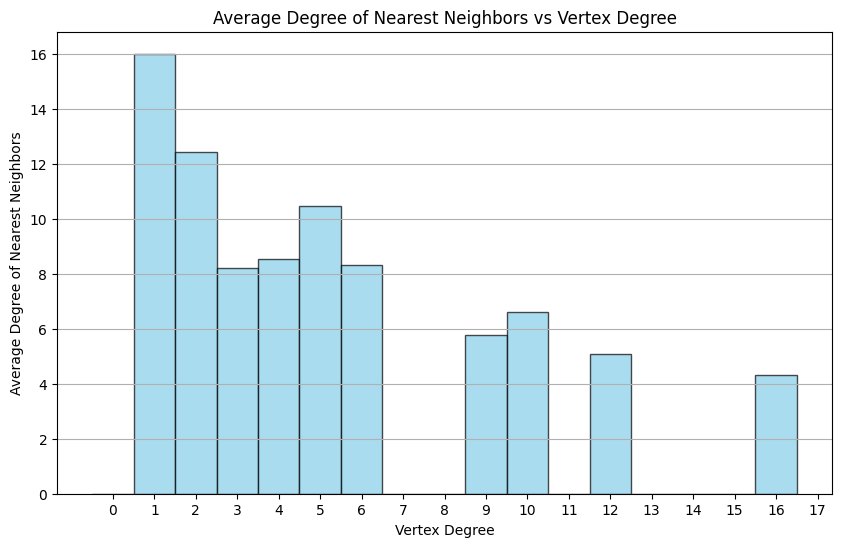

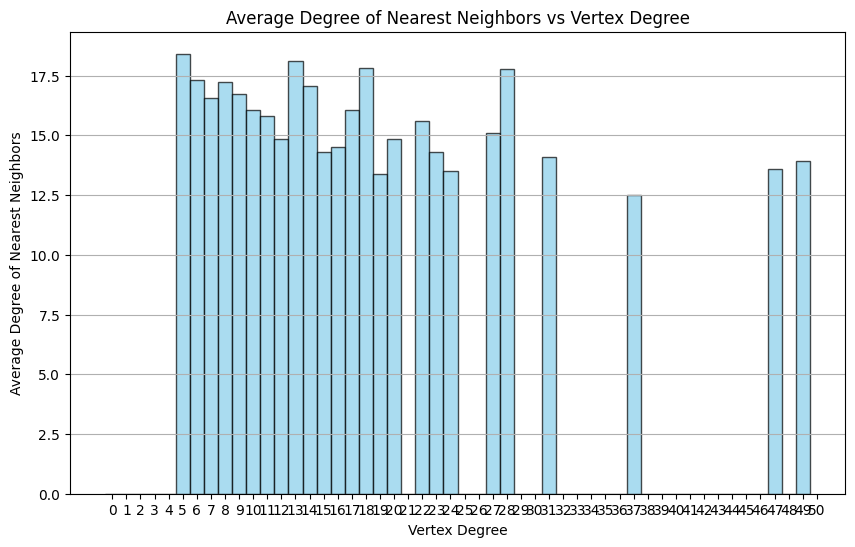

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Function to calculate average degree of nearest neighbors
def average_nearest_neighbor_degree(G):
    avg_neighbor_degree = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:  # If the node has neighbors
            neighbor_degrees = [G.degree(n) for n in neighbors]
            avg_neighbor_degree[node] = np.mean(neighbor_degrees)
        else:
            avg_neighbor_degree[node] = 0  # If no neighbors, average is 0
    return avg_neighbor_degree

# Function to plot average nearest neighbor degree vs vertex degree
def plot_avg_neighbor_degree(G):
    avg_neighbor_degree = average_nearest_neighbor_degree(G)
    degrees = [G.degree(node) for node in G.nodes()]
    avg_neighbors = list(avg_neighbor_degree.values())

    # Group data by degree
    degree_bins = np.arange(0, max(degrees) + 1, 1)
    avg_neighbors_binned = []
    for i in range(len(degree_bins) - 1):
        bin_mask = (np.array(degrees) >= degree_bins[i]) & (np.array(degrees) < degree_bins[i + 1])
        if np.any(bin_mask):
            avg_neighbors_binned.append(np.mean(np.array(avg_neighbors)[bin_mask]))
        else:
            avg_neighbors_binned.append(0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(degree_bins[:-1], avg_neighbors_binned, width=1, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title("Average Degree of Nearest Neighbors vs Vertex Degree")
    plt.xlabel("Vertex Degree")
    plt.ylabel("Average Degree of Nearest Neighbors")
    plt.xticks(degree_bins)
    plt.grid(axis='y')
    plt.show()

# Example: Using a real network (e.g., Zachary's Karate Club)
G_real = nx.karate_club_graph()  # You can replace this with your chosen real network
plot_avg_neighbor_degree(G_real)

# Example: Using an artificial network (e.g., Barabasi-Albert model)
G_artificial = nx.barabasi_albert_graph(200, 5)  # 1000 nodes, 5 edges added for each new node
plot_avg_neighbor_degree(G_artificial)


### Problem 4 

Check how random edge switching affects the result of the previous task. 

### Solution

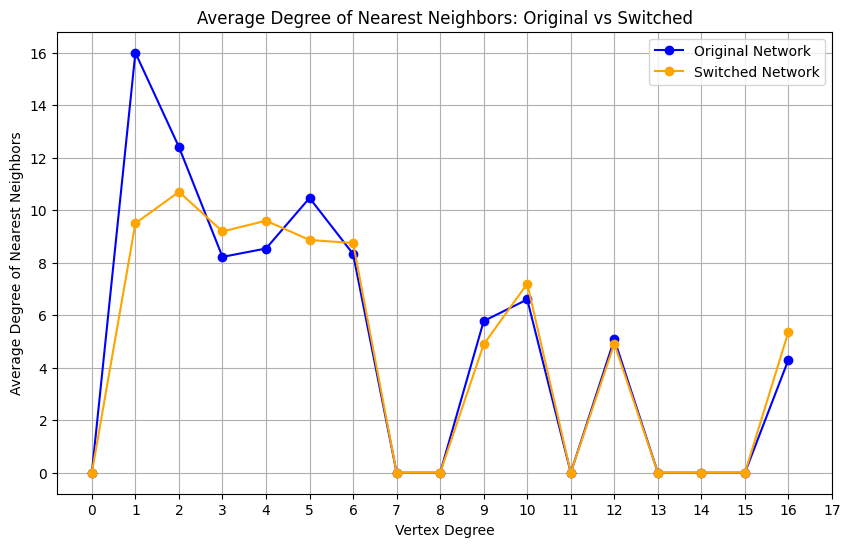

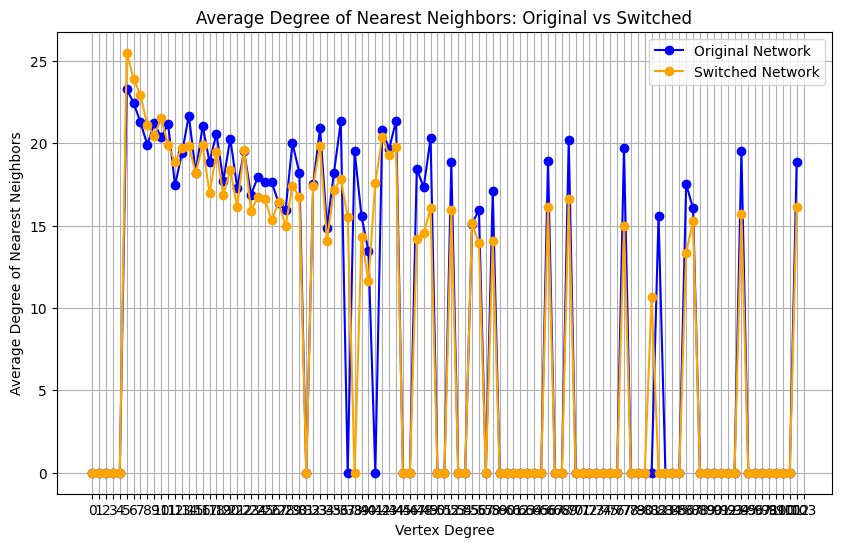

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Function to calculate average degree of nearest neighbors
def average_nearest_neighbor_degree(G):
    avg_neighbor_degree = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:  # If the node has neighbors
            neighbor_degrees = [G.degree(n) for n in neighbors]
            avg_neighbor_degree[node] = np.mean(neighbor_degrees)
        else:
            avg_neighbor_degree[node] = 0  # If no neighbors, average is 0
    return avg_neighbor_degree

# Function to perform random edge switching
def random_edge_switching(G, num_switches=1000):
    edges = list(G.edges())
    for _ in range(num_switches):
        if len(edges) < 2:
            break
        edge1, edge2 = random.sample(edges, 2)  # Select two random edges
        u1, v1 = edge1
        u2, v2 = edge2
        # Switch the endpoints of the edges
        if (u1, v2) not in edges and (u2, v1) not in edges and u1 != v2 and u2 != v1:
            edges.remove(edge1)
            edges.remove(edge2)
            edges.append((u1, v2))
            edges.append((u2, v1))
    G_new = nx.Graph()
    G_new.add_edges_from(edges)
    return G_new

# Function to plot average neighbor degree
def plot_avg_neighbor_degree(original_G, switched_G):
    original_avg_neighbor_degree = average_nearest_neighbor_degree(original_G)
    switched_avg_neighbor_degree = average_nearest_neighbor_degree(switched_G)

    # Degrees for both networks
    original_degrees = [original_G.degree(node) for node in original_G.nodes()]
    switched_degrees = [switched_G.degree(node) for node in switched_G.nodes()]
    original_neighbors = list(original_avg_neighbor_degree.values())
    switched_neighbors = list(switched_avg_neighbor_degree.values())

    # Group data by degree
    degree_bins = np.arange(0, max(original_degrees) + 1, 1)
    original_avg_neighbors_binned = []
    switched_avg_neighbors_binned = []

    for i in range(len(degree_bins) - 1):
        # Original network
        bin_mask = (np.array(original_degrees) >= degree_bins[i]) & (np.array(original_degrees) < degree_bins[i + 1])
        if np.any(bin_mask):
            original_avg_neighbors_binned.append(np.mean(np.array(original_neighbors)[bin_mask]))
        else:
            original_avg_neighbors_binned.append(0)

        # Switched network
        bin_mask_switched = (np.array(switched_degrees) >= degree_bins[i]) & (np.array(switched_degrees) < degree_bins[i + 1])
        if np.any(bin_mask_switched):
            switched_avg_neighbors_binned.append(np.mean(np.array(switched_neighbors)[bin_mask_switched]))
        else:
            switched_avg_neighbors_binned.append(0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(degree_bins[:-1], original_avg_neighbors_binned, marker='o', label='Original Network', color='blue')
    plt.plot(degree_bins[:-1], switched_avg_neighbors_binned, marker='o', label='Switched Network', color='orange')
    plt.title("Average Degree of Nearest Neighbors: Original vs Switched")
    plt.xlabel("Vertex Degree")
    plt.ylabel("Average Degree of Nearest Neighbors")
    plt.xticks(degree_bins)
    plt.legend()
    plt.grid()
    plt.show()

# Example: Using a real network (e.g., Zachary's Karate Club)
G_original = nx.karate_club_graph()  # Base network
G_switched = random_edge_switching(G_original.copy(), num_switches=1000)  # Random edge switching
plot_avg_neighbor_degree(G_original, G_switched)

# Example: Using an artificial network (e.g., Barabasi-Albert model)
G_artificial = nx.barabasi_albert_graph(1000, 5)  # Base network
G_artificial_switched = random_edge_switching(G_artificial.copy(), num_switches=1000)  # Random edge switching
plot_avg_neighbor_degree(G_artificial, G_artificial_switched)


### Problem 5

Make the derivation omitted on the lecture slide. 

### Solution

### Problem 6

Find the correlation coefficient for the network from Problem 3 and Problem 4 (before and after edge switching).  

### Solution

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import pearsonr

# Function to calculate average degree of nearest neighbors (already defined)
def average_nearest_neighbor_degree(G):
    avg_neighbor_degree = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if neighbors:  # If the node has neighbors
            neighbor_degrees = [G.degree(n) for n in neighbors]
            avg_neighbor_degree[node] = np.mean(neighbor_degrees)
        else:
            avg_neighbor_degree[node] = 0  # If no neighbors, average is 0
    return avg_neighbor_degree

# Function to perform random edge switching (already defined)
def random_edge_switching(G, num_switches=1000):
    edges = list(G.edges())
    for _ in range(num_switches):
        if len(edges) < 2:
            break
        edge1, edge2 = random.sample(edges, 2)  # Select two random edges
        u1, v1 = edge1
        u2, v2 = edge2
        # Switch the endpoints of the edges
        if (u1, v2) not in edges and (u2, v1) not in edges and u1 != v2 and u2 != v1:
            edges.remove(edge1)
            edges.remove(edge2)
            edges.append((u1, v2))
            edges.append((u2, v1))
    G_new = nx.Graph()
    G_new.add_edges_from(edges)
    return G_new

# Function to calculate and print correlation coefficients
def calculate_correlation(original_G, switched_G):
    # Average nearest neighbor degrees
    original_avg_neighbor_degree = average_nearest_neighbor_degree(original_G)
    switched_avg_neighbor_degree = average_nearest_neighbor_degree(switched_G)

    # Get degrees of vertices
    original_degrees = np.array([original_G.degree(node) for node in original_G.nodes()])
    switched_degrees = np.array([switched_G.degree(node) for node in switched_G.nodes()])

    # Prepare average neighbor degree arrays
    original_neighbors = np.array(list(original_avg_neighbor_degree.values()))
    switched_neighbors = np.array(list(switched_avg_neighbor_degree.values()))

    # Calculate correlation coefficients
    original_correlation = pearsonr(original_degrees, original_neighbors)[0]
    switched_correlation = pearsonr(switched_degrees, switched_neighbors)[0]

    print(f"Correlation coefficient before edge switching: {original_correlation:.4f}")
    print(f"Correlation coefficient after edge switching: {switched_correlation:.4f}")

# Example: Using a real network (e.g., Zachary's Karate Club)
G_original = nx.karate_club_graph()  # Base network
G_switched = random_edge_switching(G_original.copy(), num_switches=1000)  # Random edge switching

# Calculate and print correlation coefficients
calculate_correlation(G_original, G_switched)

# Example: Using an artificial network (e.g., Barabasi-Albert model)
G_artificial = nx.barabasi_albert_graph(1000, 5)  # Base network
G_artificial_switched = random_edge_switching(G_artificial.copy(), num_switches=1000)  # Random edge switching

# Calculate and print correlation coefficients for artificial network
calculate_correlation(G_artificial, G_artificial_switched)


Correlation coefficient before edge switching: -0.6050
Correlation coefficient after edge switching: -0.3689
Correlation coefficient before edge switching: -0.1478
Correlation coefficient after edge switching: -0.2406


### Problem 7

| network's name  | directed?       | N               | E               | $<K>$           | $\alpha$        | $l$             | $r$            |
|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|-----------------|----------------|
|...              |...              |...              |...              |...              |...              |...              |...             |




Let’s fil the above table with metrics of selected real networks, use the built-in functions for counting the parameters. Compare the results with the literature. 

### Solution

In [31]:
import networkx as nx
import powerlaw
import numpy as np
import pandas as pd

# read networks from .edges files
def read_network_from_edges(file_path_list):
    """
    Read a network from a .edges format file.
    
    Parameters:
    file_path (str): The path to the .edges file.
    
    Returns:
    networkx.Graph: The loaded graph.
    """
    graph_list = []
    try:
        # Read the graph from the .edges file
        for file_path in file_path_list:
            G = nx.read_edgelist(file_path, nodetype=int, data=(('weight', float),))
            graph_list.append(G)
        return graph_list
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")
        return None

def compute_network_metrics(G):
    """
    Compute basic and advanced network metrics for a single graph G.
    
    Parameters:
    G (networkx.Graph): The input network graph.
    
    Returns:
    dict: A dictionary containing the computed metrics for the graph.
    """
    
    # Number of nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    # Average degree
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    
    # Average path length (only for connected graphs)
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
    else:
        avg_path_length = np.nan  # Not applicable if the graph is disconnected
    
    # Power-law coefficient alpha for the degree distribution
    degrees = [d for _, d in G.degree()]
    if len(degrees) > 0:
        fit = powerlaw.Fit(degrees, discrete=True)
        alpha = fit.power_law.alpha
    else:
        alpha = np.nan  # Undefined if there are no degrees
    
    # Degree assortativity (correlation coefficient r)
    correlation_coeff = nx.degree_assortativity_coefficient(G)
    
    return {
        "number_of_nodes": num_nodes,
        "number_of_edges": num_edges,
        "average_degree": avg_degree,
        "average_path_length": avg_path_length,
        "power_law_coefficient_alpha": alpha,
        "correlation_coefficient_r": correlation_coeff
    }

def create_metrics_dataframe(graph_list, graph_names=None):
    """
    Compute metrics for a list of graphs and return as a Pandas DataFrame.
    
    Parameters:
    graph_list (list of networkx.Graph): List of graphs to compute metrics for.
    graph_names (list of str, optional): List of names for the graphs. Defaults to generic names.
    
    Returns:
    pd.DataFrame: A DataFrame containing the computed metrics for each graph.
    """
    # Compute metrics for each graph in the list
    metrics = []
    for i, G in enumerate(graph_list):
        graph_metrics = compute_network_metrics(G)
        graph_metrics["graph_name"] = graph_names[i] if graph_names else f"Graph_{i+1}"
        metrics.append(graph_metrics)
    
    # Create DataFrame from the list of metrics dictionaries
    df_metrics = pd.DataFrame(metrics)
    
    # Reorder columns to put "graph_name" at the beginning
    cols = ["graph_name"] + [col for col in df_metrics.columns if col != "graph_name"]
    df_metrics = df_metrics[cols]
    
    return df_metrics

In [32]:
# load all the networks 
file_path_list = [r'data\aves-barn-swallow-contact-network.edges',r'data\bio-CE-HT.edges', r'data\email-univ.edges', r'data\insecta-ant-colony1-day01.edges', r'data\mammalia-dolphin-florida-overall.edges']
graph_names = ["aves-barn-swallow-contact-network", "bio-CE-HT", "email-univ", "insecta-ant-colony1-day01", "mammalia-dolphin-florida-overall"]
graph_list = read_network_from_edges(file_path_list)

# Generate DataFrame with metrics for each graph
metrics_df = create_metrics_dataframe(graph_list, graph_names)
metrics_df

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


,graph_name,number_of_nodes,number_of_edges,average_degree,average_path_length,power_law_coefficient_alpha,correlation_coefficient_r
0,aves-barn-swallow-contact-network,17,53,6.235294,1.727941,13.039003,-0.310347
1,bio-CE-HT,2617,2985,2.281238,NaN,3.701960,-0.295975
2,email-univ,1133,5451,9.622242,3.606032,6.761006,0.078201
3,insecta-ant-colony1-day01,113,4550,80.530973,1.280973,6.558787,-0.030061
4,mammalia-dolphin-florida-overall,291,3182,21.869416,NaN,2.213315,0.177476


### Problem 8

Analyse the data on the ENP website. Draw histograms of the Erdős number for the Nobel prize and the Fields medal laureates.
 
### Solution

### Problem 9

Check the Bacon number of selected actors. Draw a histogram of Bacon number among Oscar winners. Who will find the actor with the highest Bacon number? 

### Solution